# Covid X-Ray Diagnosis
## Machine Learning Final Project
### Enver Kapetanovic & Adrien Ventugol 
### Group 15

In [14]:
from os import listdir
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import sklearn
import imblearn

In [51]:
paths = pd.read_csv("paths.csv")

In [52]:
paths.head()

,image_path,Test
0,data_upload_v2/test/covid/03BF7561-A9BA-4C3C-B...,1
1,data_upload_v2/test/covid/1-s2.0-S014067362030...,1
2,data_upload_v2/test/covid/1-s2.0-S092966462030...,1
3,data_upload_v2/test/covid/1-s2.0-S092966462030...,1
4,data_upload_v2/test/covid/1-s2.0-S092966462030...,1


In [ ]:
def to_pixel(row,width,height):
    color_img = Image.open(row["image_path"])
    color_img = color_img.resize((width, height), Image.ANTIALIAS)
    gray_img = ImageOps.grayscale(color_img)
    pixel_data.append(np.asarray(gray_img).flatten().astype(int).tolist())

width,height = 149,118
pixel_data = []

In [61]:
paths.apply(lambda row: to_pixel(row, width,height), axis = 1)
#Separate Data into X and y
y = paths.loc[0:,'Test']
X = pd.DataFrame(data = pixel_data)

0       None
1       None
2       None
3       None
4       None
5       None
6       None
7       None
8       None
9       None
10      None
11      None
12      None
13      None
14      None
15      None
16      None
17      None
18      None
19      None
20      None
21      None
22      None
23      None
24      None
25      None
26      None
27      None
28      None
29      None
        ... 
3734    None
3735    None
3736    None
3737    None
3738    None
3739    None
3740    None
3741    None
3742    None
3743    None
3744    None
3745    None
3746    None
3747    None
3748    None
3749    None
3750    None
3751    None
3752    None
3753    None
3754    None
3755    None
3756    None
3757    None
3758    None
3759    None
3760    None
3761    None
3762    None
3763    None
Length: 3764, dtype: object

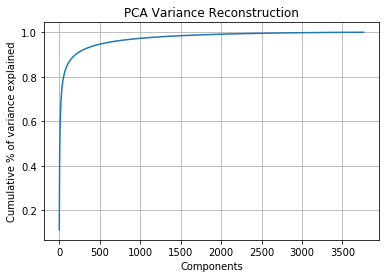

In [53]:
def mean_norm(X):
    return (X - X.mean()) / X.std()

def minMax_norm(X):
    return (X-X.min()) / X.max()-X.min()

from sklearn.decomposition import PCA

#Normalize X using mean normalization
X = mean_norm(X)

pca = PCA()
X_pca = pca.fit_transform(X)

#Find optimal number of components
plt.plot(np.cumsum(pca.explained_variance_ratio_));
plt.gca().set(
    title = "PCA Variance Reconstruction",
    xlabel = "Components",
    ylabel = "Cumulative % of variance explained"
);
plt.grid();

X  = PCA(n_components = 3500, svd_solver='full').fit_transform(X)


In [54]:
#Train test split with the mean normalized X
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X,y, train_size=.8, random_state=0)

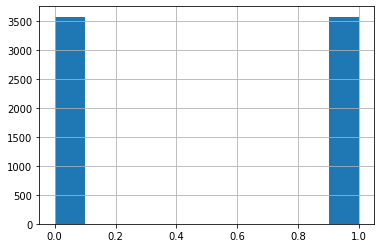

In [55]:
#Imbalanced Data, Solve with Random Over Sampling Technique
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state = 3)

X_train,y_train = ros.fit_resample(X,y)
y_train.hist()

In [56]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

In [57]:
clf = BernoulliNB()
clf.fit(X_train, y_train)

BernoulliNB()

In [58]:
recall_score(y_test, clf.predict(X_test), average = None)

array([1.        , 0.94285714])

In [59]:
recall_score(y, clf.predict(X), average = None)

array([0.99972067, 0.90217391])

In [60]:
balanced_accuracy_score(y, clf.predict(X))

0.9509472917172699